### 행정구역 정보 분석 및 시각화
1. pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기
2. Data Selection : loc[] / iloc[] 를 사용해서 특정 Row와 Column 선택하기
3. 컬럼명 변경하기
4. DataFrame 객체를 Excel file로 저장하기
5. Data Grouping : groupby() 함수를 사용해서 그룹핑하기
6. 상관관계 분석 : corr() 함수를 사용해서 인구수와 면적간의 상관관계 
7. 시각화 : seaborn의 barplot() 함수를 사용해서 Plot 그리기

In [105]:
import pandas as pd
print(pd.__version__)

2.2.2


##### pandas의 read_csv() 함수로 csv file을 읽어서 DataFrame 객체로 생성하고 데이터 확인하기

In [106]:
data = pd.read_csv('data/data_draw_korea.csv')
print(data.head())
print(type(data))

   Unnamed: 0     인구수 shortName   x  y       면적 광역시도 행정구역
0           0  202520        강릉  11  4  1040.07  강원도  강릉시
1           1   25589    고성(강원)   9  0   664.19  강원도  고성군
2           2   86747        동해  11  5   180.01  강원도  동해시
3           3   63986        삼척  11  8  1185.80  강원도  삼척시
4           4   76733        속초   9  1   105.25  강원도  속초시
<class 'pandas.core.frame.DataFrame'>


In [107]:
# head() 함수
data.head(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,0,202520,강릉,11,4,1040.07,강원도,강릉시
1,1,25589,고성(강원),9,0,664.19,강원도,고성군
2,2,86747,동해,11,5,180.01,강원도,동해시


In [108]:
# tail() 함수
data.tail(3)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
226,226,62809,진천,5,11,406.08,충청북도,진천군
227,227,790216,청주,6,12,932.51,충청북도,청주시
228,228,198077,충주,6,10,983.70,충청북도,충주시


In [109]:
# sample() 함수 (default는 1개)
data.sample(4)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
36,36,95614,양평,9,6,877.08,경기도,양평군
124,124,526157,서울강남,6,7,39.50,서울특별시,강남구
146,146,140595,서울종로,6,3,23.90,서울특별시,종로구
103,103,190815,대전대덕,5,12,68.45,대전광역시,대덕구


In [110]:
# 컬렴명 확인하기
print(f"data.columns: {data.columns}")
# 인덱스 확인하기
print(f"data.index: {data.index}")

data.columns: Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')
data.index: RangeIndex(start=0, stop=229, step=1)


In [111]:
# values 속성으로 값 확인하기
print(type(data.values))
data.values

<class 'numpy.ndarray'>


array([[0, 202520, '강릉', ..., 1040.07, '강원도', '강릉시'],
       [1, 25589, '고성(강원)', ..., 664.19, '강원도', '고성군'],
       [2, 86747, '동해', ..., 180.01, '강원도', '동해시'],
       ...,
       [226, 62809, '진천', ..., 406.08, '충청북도', '진천군'],
       [227, 790216, '청주', ..., 932.51, '충청북도', '청주시'],
       [228, 198077, '충주', ..., 983.7, '충청북도', '충주시']], dtype=object)

In [112]:
# info() 함수
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  229 non-null    int64  
 1   인구수         229 non-null    int64  
 2   shortName   229 non-null    object 
 3   x           229 non-null    int64  
 4   y           229 non-null    int64  
 5   면적          229 non-null    float64
 6   광역시도        229 non-null    object 
 7   행정구역        229 non-null    object 
dtypes: float64(1), int64(4), object(3)
memory usage: 14.4+ KB
None


In [113]:
# 모든 컬럼의 타입 확인
data.dtypes

Unnamed: 0      int64
인구수             int64
shortName      object
x               int64
y               int64
면적            float64
광역시도           object
행정구역           object
dtype: object

In [114]:
# 면적 컬럼의 타입을 확인
print(type(data['면적']))
data['면적'].dtype

<class 'pandas.core.series.Series'>


dtype('float64')

In [115]:
# 특정컬럼(인구수)의 타입 확인
print(type(data['인구수']))
data['인구수'].dtype

<class 'pandas.core.series.Series'>


dtype('int64')

In [116]:
# describe() 함수, 숫자 타입인 컬럼의 통계함수 출력 (문자 없이, 숫자 data만)
data.describe()

,Unnamed: 0,인구수,x,y,면적
count,229.000000,2.290000e+02,229.000000,229.000000,229.000000
mean,114.000000,2.110898e+05,6.117904,11.262009,435.419795
std,66.250786,2.074378e+05,3.320469,6.040898,381.612549
min,0.000000,8.392000e+03,0.000000,0.000000,2.800000
25%,57.000000,4.955900e+04,3.000000,6.000000,54.000000
50%,114.000000,1.401590e+05,6.000000,11.000000,436.400000
75%,171.000000,3.216180e+05,9.000000,16.000000,692.800000
max,228.000000,1.125461e+06,13.000000,25.000000,1817.940000


In [117]:
# describe() 함수, 문자열(object) 타입인 컬럼의 통계함수 출력
data.describe(include=[object])

,shortName,광역시도,행정구역
count,229,229,229
unique,229,17,206
top,강릉,경기도,동구
freq,1,31,6


In [118]:
data['행정구역'] == '동구'

0      False
1      False
2      False
3      False
4      False
       ...  
224    False
225    False
226    False
227    False
228    False
Name: 행정구역, Length: 229, dtype: bool

In [119]:
# 해당 조건식과 매칭되는 Row data 출력
data.loc[data['행정구역'] == '동구']

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
92,92,97571,광주동구,3,20,48.86,광주광역시,동구
98,98,330830,대구동구,11,13,182.35,대구광역시,동구
104,104,236524,대전동구,5,13,136.80,대전광역시,동구
112,112,85952,부산동구,10,17,9.77,부산광역시,동구
151,151,164738,울산동구,12,14,35.77,울산광역시,동구
159,159,68950,인천동구,1,5,7.05,인천광역시,동구


In [120]:
# '광역시도' == '경기도'
data.loc[data['광역시도'] == '경기도'].reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,18,53497,가평,9,3,843.040,경기도,가평군
1,19,955384,고양,4,2,267.330,경기도,고양시
2,20,63227,과천,7,7,35.813,경기도,과천시
3,21,327111,광명,3,3,38.500,경기도,광명시
4,22,290210,광주,8,7,431.840,경기도,광주시
5,23,175676,구리,9,4,33.300,경기도,구리시
6,24,273302,군포,5,8,36.350,경기도,군포시
7,25,326523,김포,2,3,276.640,경기도,김포시
8,26,610300,남양주,8,3,458.440,경기도,남양주시
9,27,90398,동두천,7,2,95.680,경기도,동두천시


In [121]:
# describe() 함수, 모든 컬럼의 통계함수 출력
data.describe(include='all')

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
count,229.000000,2.290000e+02,229,229.000000,229.000000,229.000000,229,229
unique,NaN,NaN,229,NaN,NaN,NaN,17,206
top,NaN,NaN,강릉,NaN,NaN,NaN,경기도,동구
freq,NaN,NaN,1,NaN,NaN,NaN,31,6
mean,114.000000,2.110898e+05,NaN,6.117904,11.262009,435.419795,NaN,NaN
std,66.250786,2.074378e+05,NaN,3.320469,6.040898,381.612549,NaN,NaN
min,0.000000,8.392000e+03,NaN,0.000000,0.000000,2.800000,NaN,NaN
25%,57.000000,4.955900e+04,NaN,3.000000,6.000000,54.000000,NaN,NaN
50%,114.000000,1.401590e+05,NaN,6.000000,11.000000,436.400000,NaN,NaN
75%,171.000000,3.216180e+05,NaN,9.000000,16.000000,692.800000,NaN,NaN


### Data Selection
* loc[] 또는 iloc[]
* loc[Row 선택, Column 선택]

In [122]:
# 인구수 1개의 컬럼 선택
# data['인구수'] # Series 타입
data[['인구수']] # DataFrame 타입

,인구수
0,202520
1,25589
2,86747
3,63986
4,76733
...,...
224,127462
225,34480
226,62809
227,790216


In [123]:
# ['행정구역','인구수','면적'] 컬럼의 데이터 출력
data[['행정구역','인구수','면적']].head(5)

,행정구역,인구수,면적
0,강릉시,202520,1040.07
1,고성군,25589,664.19
2,동해시,86747,180.01
3,삼척시,63986,1185.80
4,속초시,76733,105.25


In [124]:
# 인구수 가장 많은 행정구역 5개 출력
data[['행정구역','인구수']].sort_values(by='인구수', ascending=False).head(5).reset_index(drop=True)

,행정구역,인구수
0,수원시,1125461
1,창원시,1010040
2,고양시,955384
3,용인시,915005
4,성남시,911628


In [125]:
# 인구수 가장 적은 행정구역 5개 출력
data[['광역시도', '행정구역', '인구수', '면적']].sort_values(by='인구수', ascending=True).head(5).reset_index(drop=True)

,광역시도,행정구역,인구수,면적
0,경상북도,울릉군,8392,72.82
1,경상북도,영양군,16009,815.11
2,인천광역시,옹진군,17735,164.30
3,전라북도,장수군,20492,533.64
4,경상북도,군위군,20596,614.15


In [126]:
# 인구수 컬럼의 집계함수

print(data['인구수'].max()) # 최대값
print(data['인구수'].min()) # 최소값
print(data['인구수'].mean()) # 평균값
print(data['인구수'].sum()) # 총합
print(data['인구수'].median()) # 중앙값

1125461
8392
211089.77729257641
48339559
140159.0


In [127]:
# 인구수가 가장 많은 행정구역?
# 인구수의 최대값을 max_prop 변수에 저장

#data['인구수'] == max_prop

max_prop = data['인구수'].max()
data.loc[data['인구수'] == max_prop].reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,30,1125461,수원,6,9,121.09,경기도,수원시


In [128]:
# 면적이 넓은 행정구역?
max_area = data['면적'].max()
data.loc[data['면적'] == max_area].reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,15,62957,홍천,10,4,1817.94,강원도,홍천군


In [129]:
# 인구수가 가장 적은 행정구역?
data.loc[data['인구수'] == data['인구수'].min()].reset_index(drop=True)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
0,83,8392,울릉,13,6,72.82,경상북도,울릉군


In [130]:
# unique한 광역시도명
print(len(data['광역시도'].unique())) # 17개
data['광역시도'].unique()

17


array(['강원도', '경기도', '경상남도', '경상북도', '광주광역시', '대구광역시', '대전광역시', '부산광역시',
       '서울특별시', '세종특별자치시', '울산광역시', '인천광역시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도'], dtype=object)

In [131]:
# 광역시도별 Row Counting
data['광역시도'].value_counts()

광역시도
경기도        31
서울특별시      25
경상북도       23
전라남도       22
강원도        18
경상남도       18
부산광역시      16
충청남도       15
전라북도       14
충청북도       11
인천광역시      10
대구광역시       8
대전광역시       5
광주광역시       5
울산광역시       5
제주특별자치도     2
세종특별자치시     1
Name: count, dtype: int64

In [132]:
# data['광역시도'] == '경기도' 의 ['광역시도','인구수','면적']  컬럼의 데이터 출력하기
data.loc[data['광역시도'] == '경기도', ['광역시도','인구수','면적']].reset_index(drop=True)

,광역시도,인구수,면적
0,경기도,53497,843.040
1,경기도,955384,267.330
2,경기도,63227,35.813
3,경기도,327111,38.500
4,경기도,290210,431.840
5,경기도,175676,33.300
6,경기도,273302,36.350
7,경기도,326523,276.640
8,경기도,610300,458.440
9,경기도,90398,95.680


In [133]:
# data['광역시도'] == '경기도' 의 ['행정구역','인구수','면적']  컬럼의 데이터를 면적을 descending 순서대로 출력하기
data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by='면적', ascending=False).reset_index(drop=True)

,행정구역,인구수,면적
0,양평군,95614,877.080
1,가평군,53497,843.040
2,포천시,140159,826.380
3,연천군,41076,695.230
4,화성시,555129,688.100
5,파주시,385528,672.560
6,여주시,100669,608.640
7,용인시,915005,591.500
8,안성시,173061,554.200
9,이천시,190537,461.020


In [134]:
#경기도에 속한 행정구역명, 인구수, 면적 선택하기 인구수를 descending 순서대로 출력하고 index reset 하여 gy_df 라는 변수에 저장하기
#data.loc[row , col]
gy_df = data.loc[data['광역시도'] == '경기도', ['행정구역','인구수','면적']].sort_values(by='인구수', ascending=False).reset_index(drop=True).copy()

# 인구수2 라는 새로운 컬럼을 생성
# gy_df['인구수2'] = gy_df['인구수'].apply('{:,}'.format) 
# gy_df['인구수2'] = gy_df['인구수'].map('{:,}'.format)
gy_df['인구수2'] = gy_df['인구수'].map(lambda x: '{:,}'.format(x))

# gy_df[['인구수', '인구수2']] # 2개 컬럼 선택
gy_df.head(5) # 5개 행 출력

,행정구역,인구수,면적,인구수2
0,수원시,1125461,121.09,"1,125,461"
1,고양시,955384,267.33,"955,384"
2,용인시,915005,591.50,"915,005"
3,성남시,911628,141.82,"911,628"
4,부천시,805473,53.44,"805,473"


In [191]:
# 면적이 > 1000 큰 조건과 매핑되는 새로운 DataFrame 생성 area_1000 라는 변수에 저장하기
area_1000 = data.loc[data['면적'] > 1000, ['행정구역','인구수','면적']].sort_values(by='면적', ascending=False).reset_index(drop=True).copy()

# area_1000 DataFrame 객체에 면적2 컬럼을 생성, 전체 row에 적용
area_1000['면적2'] = area_1000['면적'].map(lambda x: '{:,.3f}'.format(x))

area_1000.head(5) # 5개 행 출력하기

,행정구역,인구수,면적,면적2
0,홍천군,62957,1817.94,"1,817.940"
1,인제군,29260,1646.08,"1,646.080"
2,안동시,157317,1519.00,"1,519.000"
3,평창군,38439,1463.65,"1,463.650"
4,경주시,242618,1323.85,"1,323.850"


In [198]:
# area_1000 DataFrame 객체에 면적3 컬럼을 생성, 조건을 만족하는 Row에 적용됨
area_1000.loc[area_1000['면적'] > 1500,'면적3'] = area_1000['면적'].map(lambda x: '{:,.3f}'.format(x))

area_1000.head(5) # 5개 행 출력하기

,행정구역,인구수,면적,면적2,면적3
0,홍천군,62957,1817.94,"1,817.940","1,817.940"
1,인제군,29260,1646.08,"1,646.080","1,646.080"
2,안동시,157317,1519.00,"1,519.000","1,519.000"
3,평창군,38439,1463.65,"1,463.650",NaN
4,경주시,242618,1323.85,"1,323.850",NaN


In [ ]:
#경기도 인구수의 평균과 표준편차
# data.loc[data['광역시도'] == '경기도' , '인구수'].mean()
# data.loc[data['광역시도'] == '경기도' , '인구수'].std()
data.loc[data['광역시도'] == '경기도' , '인구수'].agg(['mean', 'std'])

mean    378845.483871
std     304548.395142
Name: 인구수, dtype: float64

In [210]:
#광역시도명을 인자로 받아서 해당 광역시에 속한 행정구역들의 인구수의 평균과 편차 구하기
# def pop_mean_std(sido_name: str):
#     return data.loc[data['광역시도'] == sido_name , '인구수'].agg(['mean', 'std'])

def pop_mean_std(df, sido_name):
    sido_df = df.loc[data['광역시도'] == sido_name,'인구수':'행정구역']
    print(f"{sido_name} 인구수 평균 = {sido_df['인구수'].mean()}")
    print(f"{sido_name} 인구수 편차 = {sido_df['인구수'].std()}")

In [ ]:
# pop_mean_std('서울특별시')
pop_mean_std(data, '서울특별시')

서울특별시 인구수 평균 = 375792.28
서울특별시 인구수 편차 = 125231.24797500289


In [139]:
# Unique한 광역시도명 순회하면서  광역시도명을 출력합니다. 


In [140]:
#loc[] 사용
#인덱스가 20 부터 25까지


In [141]:
#iloc[] 사용
#인덱스가 20 부터 24까지


In [142]:
#iloc[row index, column index] 사용 
#인덱스가 20 부터 25까지 컬럼이 인구수부터 행정구역 까지


In [143]:
#loc[] 사용
#index가 40,55,60 이고, column이 인구수,광역시도,행정구역


In [144]:
#인덱스가 0인 행 하나만 선택


In [145]:
#열 하나만 선택


### 컬럼명 변경하기, 컬럼을 인덱스 전환하기
* rename() 함수
* inPlace=False (default) 원본 DataFrame객체를 변경하지 않고, 변경한 결과만 출력한다.
* inPlace=True 원본 DataFrame객체를 변경하고, 변경한 결과는 출력하지 않는다.

In [146]:
data.columns

Index(['Unnamed: 0', '인구수', 'shortName', 'x', 'y', '면적', '광역시도', '행정구역'], dtype='object')

In [147]:
# 'Unnamed: 0' 컬럼명을 'seq' 로 변경한다. 원본 객체는 변경되지 않고 변경된 결과만 출력함


In [148]:
#원본 객체가 변경되고 변경된 결과는 출력하지 않는다.


In [149]:
# seq 컬럼을 인덱스로 변경한다 ( 원본 객체가 변경됨 )


### DataFrame을 Excel file로 저장하기
* 인구수가 평균보다 작은 행정구역, 광역시도, 인구수를 선택해서 DataFrame생성하기
* DataFrame의 to_excel() 함수 사용

In [150]:
# 인구수의 평균값 구하기


In [151]:
# 인구수의 평균값보다 작은 Row를 선택하고, '광역시도','행정구역','인구수' 컬럼값을 가져오기
# 정렬할때 광역시도는 ascending으로 , 인구수는 descending


In [152]:
# DataFrame의 to_excel() 함수를 사용하여 excel 파일로 저장


### GroupBy 기능 사용하기
* 광역시도별 행정구역의 인구수 합계
* ~별에 해당하는 컬럼명이나 컬럼값을 groupby() 함수의 인자로 전달한다.
* Series 객체의 groupby(data['광역시도']) 함수는 컬럼의 값을 인자로 전달하고
* DataFrame 객체의 groupby('광역시도') 함수는 컬럼명을 인자로 전달합니다.

In [153]:
# Series 객체 사용 - 광역시도별 인구수의 합계 
# SeriesGroupBy object


In [154]:
# DataFrame 객체 사용 - 광역시도별 인구수의 합계 
# DataFrameGroupBy object


In [155]:
# DataFrameGroupBy 


In [156]:
# 광역시도별 행정구역별 인구수의 합계


In [157]:
# data/광역시도별행정구역별인구수의합계.xlsx 파일로 저장하기


### 엑셀 수치 데이터에 콤마찍기
[pandas.ExcelWriter](https://pandas.pydata.org/docs/reference/api/pandas.ExcelWriter.html)

In [158]:
#%pip install xlsxwriter

In [159]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
#writer = pd.ExcelWriter('data/광역시도별인구수의합계1.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
#group_df.to_excel(writer, sheet_name='인구수합계')

# Get the xlsxwriter workbook and worksheet objects.
# workbook  = writer.book
# worksheet = writer.sheets['인구수합계']

# Set a currency number format for a column.
# num_format = workbook.add_format({'num_format': '#,###'})
# worksheet.set_column('C:C', None, num_format)

# Close the Pandas Excel writer and output the Excel file.
# writer.close() #_save()

#### 상관계수 (Correlation Coefficient)
* 인구수와 면적 데이터간에 관련성이 있는지 살펴보기 위해서 상관계수 구하기
* 상관계수 값은 -1 ~ 1 사이의 값이며, 0에 가까울 수록 관련성이 낮고, 1에 가까울 수록 관련성이 높다. 
* 음수는 반비례 (면적이 넓은 반면 인구수는 적은 경우), 양수는 비례 (면적이 넓고, 인구수도 높은 경우)
* corr() 함수

In [160]:
#전국의 면적과 인구수의 상관계수 구하기


In [161]:
#서울의 면적과 인구수의 상관계수 구하기


In [162]:
#경기도의 면적과 인구수의 상관계수 구하기


#### Groupby 한 DataFrame에 집계함수를 여러개 설정하기
* agg() 함수
* agg(['max','mean','std'])

In [163]:
# agg() 함수 사용하여 여러개의 통계함수를 사용합니다. 
# fillna(0) NaN 을 0 으로 변경해 줌


In [164]:
# agg() 함수 사용 - 그룹핑한 데이터를 여러개의 집계함수를 사용해서 새로운 DataFrame 객체 생성하기


In [165]:
# DataFrame의 style.format() 함수 사용하기


In [166]:
# 컬럼의 값을 변경하기 map() 함수를 사용하여 포맷하기


#### 시각화
* %matplotlib inline 설정 (jupyter 에서는 show() 함수를 호출하지 않아도 plot이 출력된다)
* 한글폰트 설정이 필요함
* Plot에 대한 설정은 matplotlib의 함수를 사용하고, Plot을 그려주는 기능은 seaborn()의 함수를 사용합니다. 

In [213]:
%matplotlib inline

In [214]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

print('matplotlib ', matplotlib.__version__)
print('seaborn ', sns.__version__)

matplotlib  3.9.2
seaborn  0.13.2


In [215]:
# for font in fm.fontManager.ttflist:
#     print((font.name, font.fname))
# 폰트이름과 폰트파일 정보 출력 list comprehension 
[(font.name, font.fname) for font in fm.fontManager.ttflist if 'Malgun' in font.name]

[('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunsl.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgun.ttf'),
 ('Malgun Gothic', 'C:\\Windows\\Fonts\\malgunbd.ttf')]

In [246]:
# font name을 알고 있다면 생략가능
#한글폰트 path 설정
font_path = 'C:\\Windows\\Fonts\\malgun.ttf'
#font의 파일정보로 font name 을 알아내기
font_name = fm.FontProperties(fname=font_path).get_name()
print(font_name)

Malgun Gothic


In [247]:
# matplotlib의 rc(run command) 함수를 사용해서 font name(Malgun Gothic) 설정
matplotlib.rc('font', family=font_name)

### Figure, Axes, Plot
* Axes는 Plot이 실제 그려지는 공간
* Figure는 Axes 보다 더 상위의 공간 : Figure을 여러개의 Axes로 분할해서 Plot를 그릴 수 있다
* 비교) Axis는 X 축, Y축
* seaborn의 barplot() 함수(막대그래프) 사용

In [248]:
seoul_df = data.loc[data['광역시도'] == '서울특별시']
seoul_df.head(5)

,Unnamed: 0,인구수,shortName,x,y,면적,광역시도,행정구역
124,124.0,526157.0,서울강남,6.0,7.0,39.5,서울특별시,강남구
125,125.0,432028.0,서울강동,8.0,5.0,24.6,서울특별시,강동구
126,126.0,310292.0,서울강북,5.0,2.0,23.6,서울특별시,강북구
127,127.0,554709.0,서울강서,4.0,4.0,41.4,서울특별시,강서구
128,128.0,484478.0,서울관악,5.0,6.0,29.6,서울특별시,관악구


In [ ]:
# 광역시도 이름을 인자로 받아서 인구수와 면적을 그려주는 함수
def show_pop_area(sido_name):
    # 입력받은 광역시도에 해당하는 DataFrame 객체생성
    sido_df = data.loc[data['광역시도'] == sido_name]
    # Figure와 Axes 객체 생성
    figure, (axes1,axes2) = plt.subplots(nrows=2, ncols=1)
    # Figure size 확대
    figure.set_size_inches(18,12)
    
    pop_plot = sns.barplot(x='행정구역', y='인구수', data=sido_df.sort_values(by='인구수',ascending=False), ax=axes1,hue='행정구역')
    pop_plot.set_title(f'{sido_name} 행정구역별 인구수')
    area_plot = sns.barplot(x='행정구역', y='면적', data=sido_df.sort_values(by='면적',ascending=False), ax=axes2,hue='행정구역')
    area_plot.set_title(f'{sido_name} 행정구역별 면적')
    plt.show()

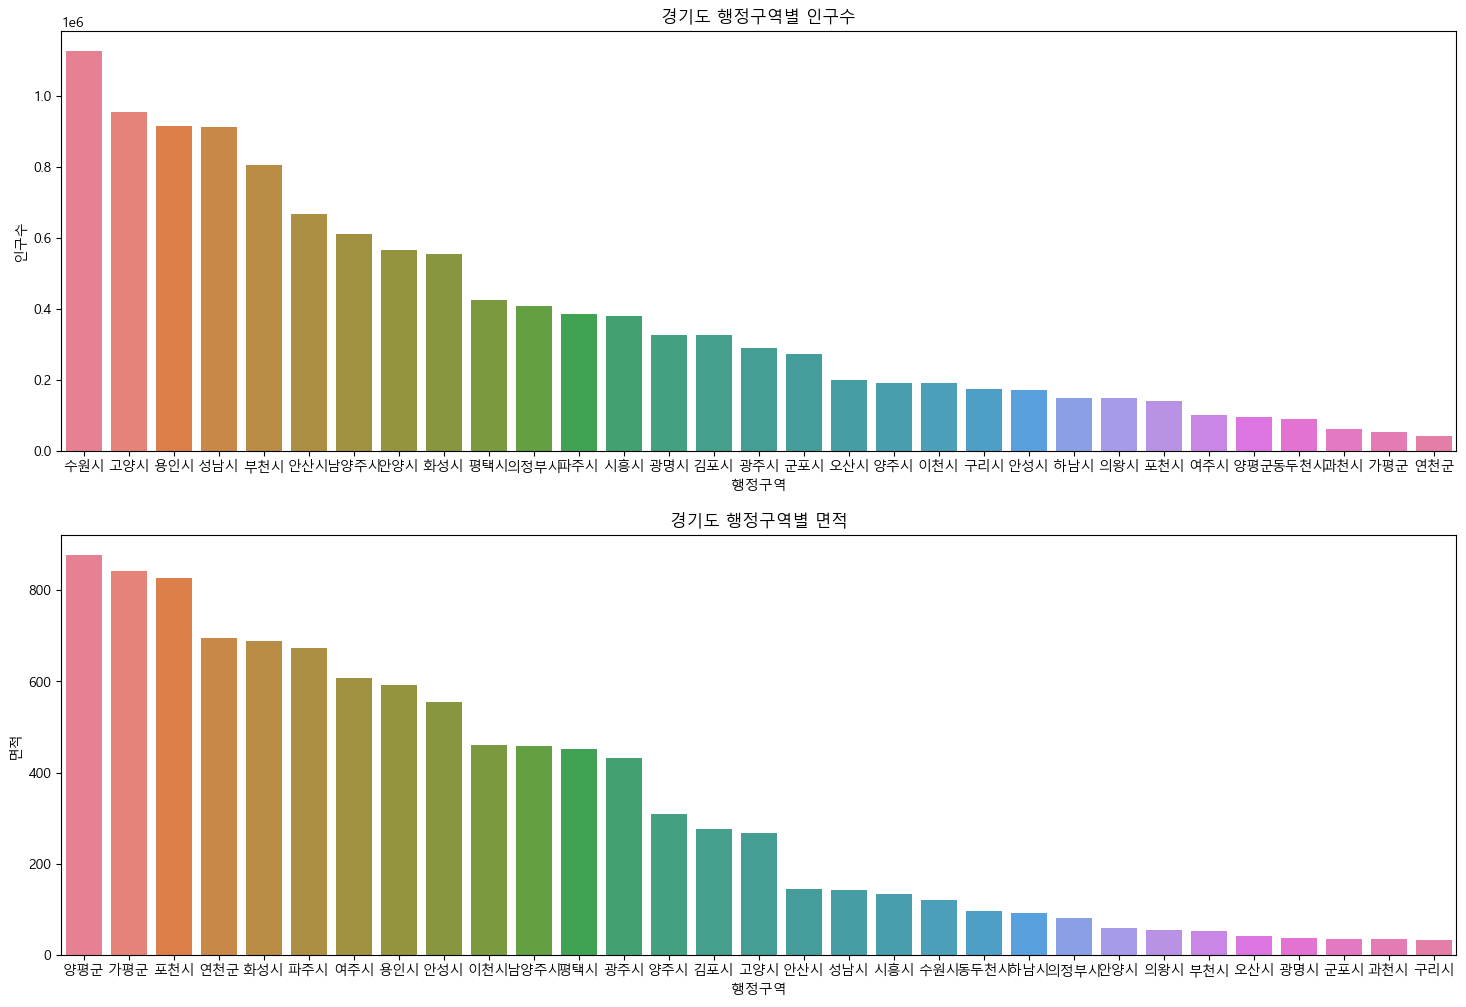

In [252]:
show_pop_area('경기도')

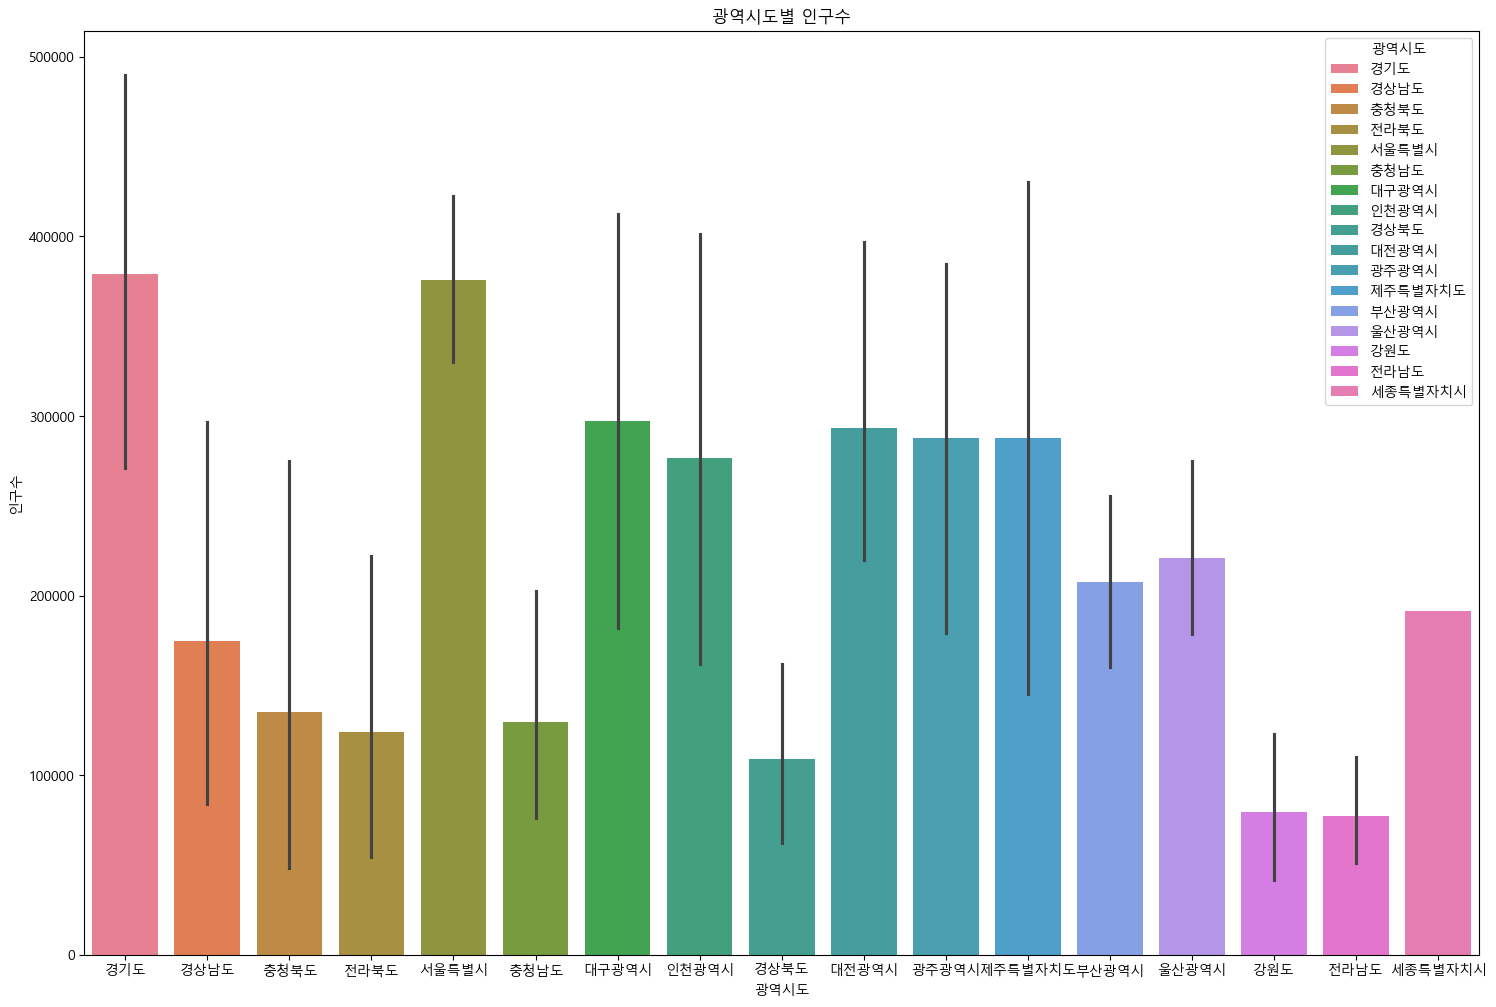

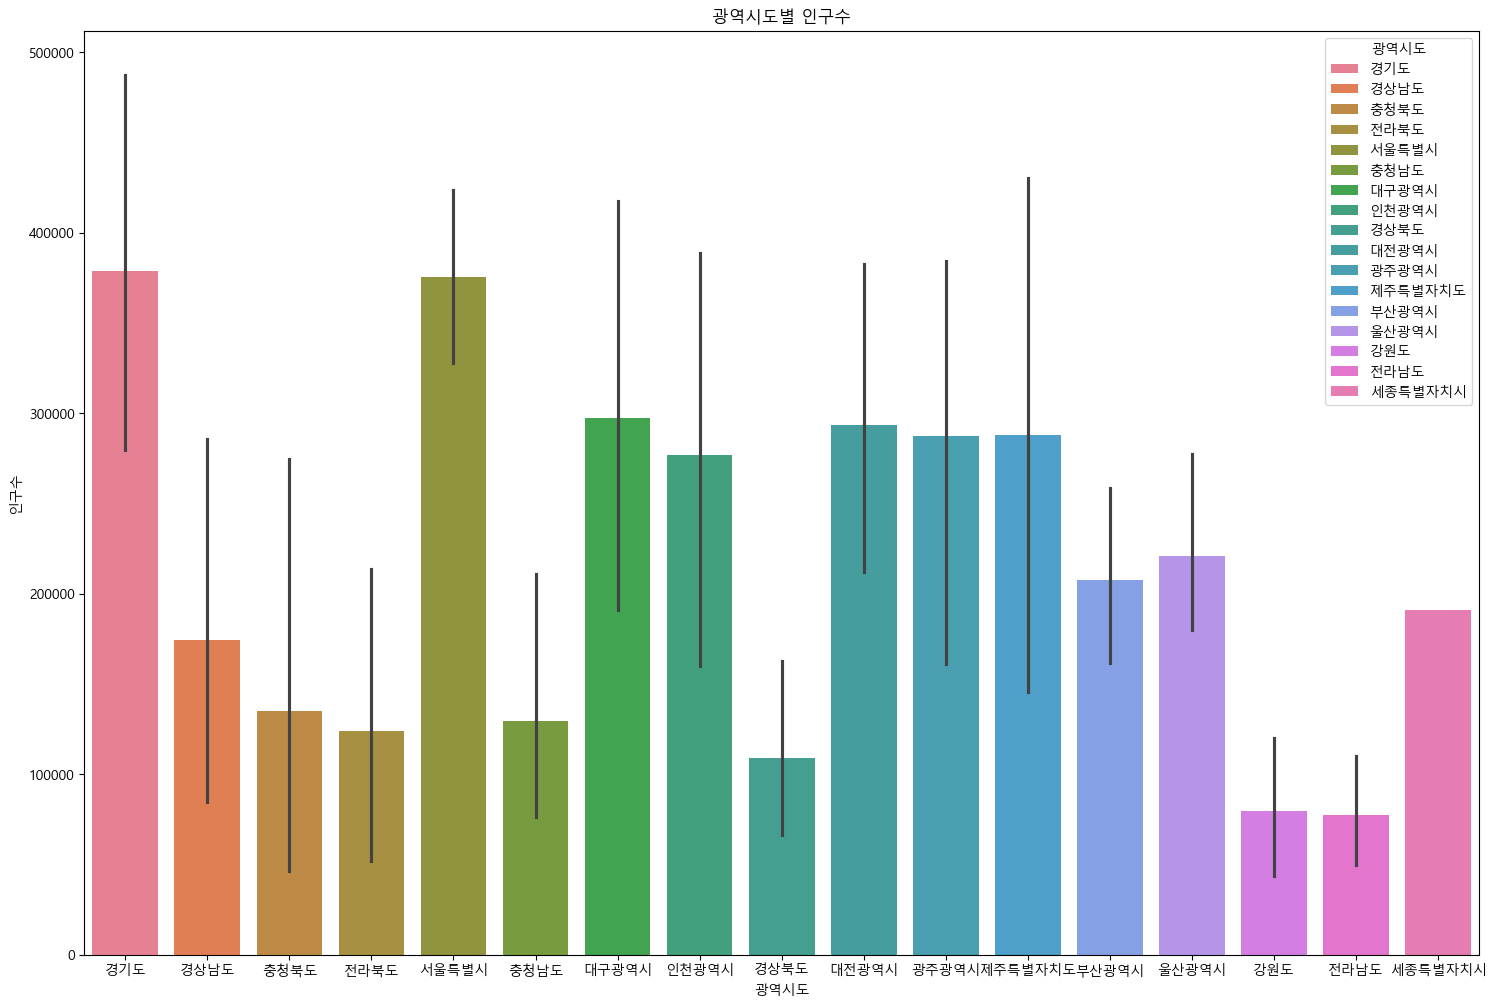

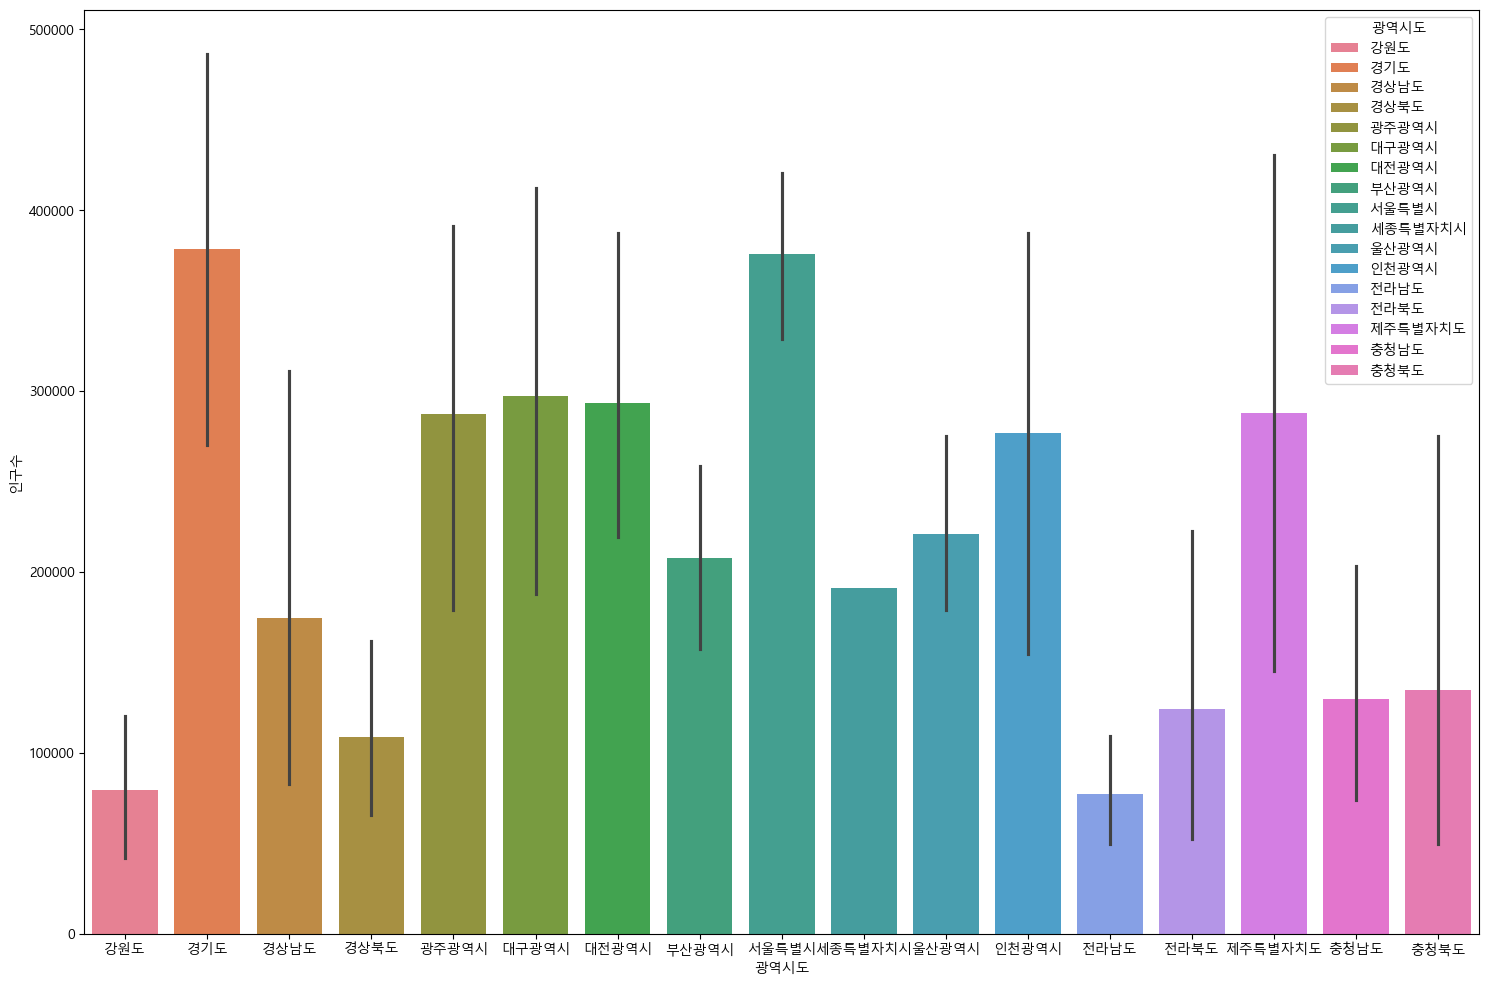

In [255]:
# 전국데이터의 광역시도의 인구수 
figure, axes1 = plt.subplots(nrows=1, ncols=1)
figure.set_size_inches(18,12)
sns.barplot(x='광역시도', y='인구수', data=data, ax=axes1, hue='광역시도')
plt.show()

In [176]:
# figure, ax1 = plt.subplots(nrows=1, ncols=1)
# figure.set_size_inches(18,12)
# sns.barplot(data=seoul_df, x="행정구역", y="인구수", ax=ax1,hue='행정구역')

#y축의 label값에 ,(콤마) 출력하기
# ax1.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))


# for item in ax1.get_xticklabels(): 
#     item.set_rotation(90)
# for i, v in enumerate(seoul_df["인구수"].items()):
#     ax1.text(i ,v[1], "{:,}".format(v[1]), color='m', va ='bottom', rotation=45)
# plt.tight_layout()